In [25]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib

In [28]:
dir(ensemble)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'VotingClassifier',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_gradient_boosting',
 'bagging',
 'base',
 'forest',
 'gradient_boosting',
 'iforest',
 'partial_dependence',
 'voting_classifier',
 'weight_boosting']

# Very simple example: Dogs 
Ideal features are 
* informative
* independent
* simple

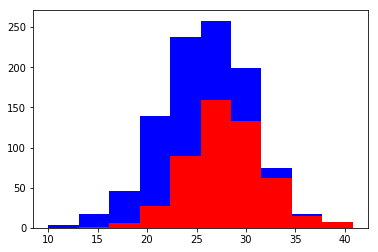

In [26]:
greyhounds = 500
labs = 500

grey_height = 28 + 4 * np.random.randn(greyhounds) #get normally distributed 
lab_height = 24 + 4 * np.random.randn(greyhounds)

plt.hist([grey_height, lab_height], stacked=True, color=['r', 'b'])
plt.show()

# Housing price

In [2]:
os.chdir('/Users/DonginKim/Downloads/Ex_Files_Machine_Learning_EssT_ValueEstimate/Exercise Files/Chapter 3/')

In [3]:
# Load the data set
df = pd.read_csv("ml_house_data_set.csv")

In [4]:
df.head(10)

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,house_number,street_name,unit_number,city,zip_code,sale_price
0,1978,1,4,1,1,1689,1859,attached,508,0,True,False,True,True,42670,Lopez Crossing,NaN,Hallfort,10907,270897.0
1,1958,1,3,1,1,1984,2002,attached,462,0,True,False,True,True,5194,Gardner Park,NaN,Hallfort,10907,302404.0
2,2002,1,3,2,0,1581,1578,none,0,625,False,False,True,True,4366,Harding Islands,NaN,Lake Christinaport,11203,2519996.0
3,2004,1,4,2,0,1829,2277,attached,479,0,True,False,True,True,3302,Michelle Highway,NaN,Lake Christinaport,11203,197193.0
4,2006,1,4,2,0,1580,1749,attached,430,0,True,False,True,True,582,Jacob Cape,NaN,Lake Christinaport,11203,207897.0
5,2005,1,3,2,0,1621,1672,attached,430,0,True,False,True,True,78445,Michelle Highway,NaN,Lake Christinaport,11203,196559.0
6,1979,1,3,2,1,2285,2365,detached,532,0,True,False,True,True,246,Harris Estates,NaN,Morrisport,10924,434697.0
7,1958,1,5,2,0,1745,1741,none,0,0,False,False,False,False,35725,Jessica Isle,NaN,Lake Christinaport,11203,64887.0
8,1958,1,5,2,0,1747,1745,none,0,0,False,False,False,False,35725,Jessica Isle,NaN,Lake Christinaport,11203,143636.0
9,1961,1,1,1,0,998,1161,none,0,242,False,False,False,False,73327,Kurt Crescent,NaN,Lake Christinaport,11203,81896.0


# Feature Engineering / Preprocessing

In [5]:
# Remove the fields from the data set that we don't want to include in our model
del df['house_number']
del df['unit_number']
del df['street_name']
del df['zip_code']

## Replace categorical data with one-hot encoded data

In [6]:
features_df = pd.get_dummies(df, columns=['garage_type', 'city'])

# Remove the sale price from the feature data
del features_df['sale_price']  #don't put the sales price in the input data

In [7]:
features_df.head()

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_sqft,carport_sqft,has_fireplace,...,city_South Anthony,city_South Stevenfurt,city_Toddshire,city_Wendybury,city_West Ann,city_West Brittanyview,city_West Gerald,city_West Gregoryview,city_West Lydia,city_West Terrence
0,1978,1,4,1,1,1689,1859,508,0,True,...,0,0,0,0,0,0,0,0,0,0
1,1958,1,3,1,1,1984,2002,462,0,True,...,0,0,0,0,0,0,0,0,0,0
2,2002,1,3,2,0,1581,1578,0,625,False,...,0,0,0,0,0,0,0,0,0,0
3,2004,1,4,2,0,1829,2277,479,0,True,...,0,0,0,0,0,0,0,0,0,0
4,2006,1,4,2,0,1580,1749,430,0,True,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Create the X and y arrays (as numpy matrix data)
# Vectorizing to be executed in parallel
X = features_df.as_matrix()
y = df['sale_price'].as_matrix()

# Split the data set in a training set (70%) and a test set (30%)

In [9]:
# It proves that the model actually learned general rules for predicting house prices 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
# Fit regression model / gradient boosting regressor 
model = ensemble.GradientBoostingRegressor(  

# Set up hyper parameters
    n_estimators=1000,   #how many decision trees to build
    learning_rate=0.1,   #how much each additional decision tree influences the overall prediction
    max_depth=6,         #how many layers deep each individual decision tree can be
    min_samples_leaf=9,  # how many times a value must appear in our training set for a decision tree to make a decision based on it 
    max_features=0.1,    #the percentage of features in our model that we randomly choose to consider each time we create a branch in our decision tree.
    loss='huber',        #how scikit-learn calculates the model's error rate or cost as it learns
    random_state=0
)

# Train using the training data set
model.fit(X_train, y_train)  #y: correct answers, X: training features

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=6,
             max_features=0.1, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=9, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=False)

In [11]:
# Save the trained model to a file so we can use it in other programs
joblib.dump(model, 'trained_house_classifier_model.pkl')

['trained_house_classifier_model.pkl']

# Grid Search
A grid search is where you list out a range of settings you want to try for each parameter, and you literally try them all. You train and test the model for every combination of parameters. The combination of parameters that generates the best predictions are the set of parameters you should use for your real model.

In [12]:
# Parameters we want to try
param_grid = {
    'n_estimators': [500, 1000, 3000],
    'max_depth': [4, 6],
    'min_samples_leaf': [3, 5, 9, 17],
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
    'max_features': [1.0, 0.3, 0.1],
    'loss': ['ls', 'lad', 'huber']
}

In [13]:
# Define the grid search we want to run. Run it with four cpus in parallel.
gs_cv = GridSearchCV(model, param_grid, n_jobs=4)

# Run the grid search - on only the training data!
gs_cv.fit(X_train, y_train)

# Print the parameters that gave us the best result!
print(gs_cv.best_params_)

# After running a .....long..... time, the output will be something like
# {'loss': 'huber', 'learning_rate': 0.1, 'min_samples_leaf': 9, 'n_estimators': 3000, 'max_features': 0.1, 'max_depth': 6}

# That is the combination that worked best.

KeyboardInterrupt: 

In [ ]:
# Save the trained model to a file so we can use it in other programs
joblib.dump(model, 'trained_house_classifier_model.pkl')

# Check accuracy of the model using Mean Absolute Error 
Mean absolute error looks at every prediction our model makes, 
and it gives us an average of how wrong it was across all the predictions

In [ ]:
# Find the error rate on the training set
mse = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

# Find the error rate on the test set
mse = mean_absolute_error(y_test, model.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

# To see the difference between two data sets

# Feature selection
how often each feature is used in determining the final price?

In [ ]:
# These are the feature labels from our data set
feature_labels = np.array(['year_built', 'stories', 'num_bedrooms', 'full_bathrooms', 'half_bathrooms', 'livable_sqft', 'total_sqft', 'garage_sqft', 'carport_sqft', 'has_fireplace', 'has_pool', 'has_central_heating', 'has_central_cooling', 'garage_type_attached', 'garage_type_detached', 'garage_type_none', 'city_Amystad', 'city_Brownport', 'city_Chadstad', 'city_Clarkberg', 'city_Coletown', 'city_Davidfort', 'city_Davidtown', 'city_East Amychester', 'city_East Janiceville', 'city_East Justin', 'city_East Lucas', 'city_Fosterberg', 'city_Hallfort', 'city_Jeffreyhaven', 'city_Jenniferberg', 'city_Joshuafurt', 'city_Julieberg', 'city_Justinport', 'city_Lake Carolyn', 'city_Lake Christinaport', 'city_Lake Dariusborough', 'city_Lake Jack', 'city_Lake Jennifer', 'city_Leahview', 'city_Lewishaven', 'city_Martinezfort', 'city_Morrisport', 'city_New Michele', 'city_New Robinton', 'city_North Erinville', 'city_Port Adamtown', 'city_Port Andrealand', 'city_Port Daniel', 'city_Port Jonathanborough', 'city_Richardport', 'city_Rickytown', 'city_Scottberg', 'city_South Anthony', 'city_South Stevenfurt', 'city_Toddshire', 'city_Wendybury', 'city_West Ann', 'city_West Brittanyview', 'city_West Gerald', 'city_West Gregoryview', 'city_West Lydia', 'city_West Terrence'])

# Load the trained model created with train_model.py
model = joblib.load('trained_house_classifier_model.pkl')

# Create a numpy array based on the model's feature importances
importance = model.feature_importances_

# Sort the feature labels based on the feature importance rankings from the model
feauture_indexes_by_importance = importance.argsort()

# Print each feature label, from most important to least important (reverse order)
for index in feauture_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index] * 100.0)))


# Prediction 

In [ ]:
# Load the model we trained previously
model = joblib.load('trained_house_classifier_model.pkl')

# For the house we want to value, we need to provide the features in the exact same
# arrangement as our training data set.
house_to_value = [
    # House features
    2006,   # year_built
    1,      # stories
    4,      # num_bedrooms
    3,      # full_bathrooms
    0,      # half_bathrooms 
    2200,   # livable_sqft
    2350,   # total_sqft
    0,      # garage_sqft
    0,      # carport_sqft
    True,   # has_fireplace
    False,  # has_pool
    True,   # has_central_heating
    True,   # has_central_cooling
    
    # Garage type: Choose only one
    0,      # attached
    0,      # detached
    1,      # none
    
    # City: Choose only one
    0,      # Amystad
    1,      # Brownport
    0,      # Chadstad
    0,      # Clarkberg
    0,      # Coletown
    0,      # Davidfort
    0,      # Davidtown
    0,      # East Amychester
    0,      # East Janiceville
    0,      # East Justin
    0,      # East Lucas
    0,      # Fosterberg
    0,      # Hallfort
    0,      # Jeffreyhaven
    0,      # Jenniferberg
    0,      # Joshuafurt
    0,      # Julieberg
    0,      # Justinport
    0,      # Lake Carolyn
    0,      # Lake Christinaport
    0,      # Lake Dariusborough
    0,      # Lake Jack
    0,      # Lake Jennifer
    0,      # Leahview
    0,      # Lewishaven
    0,      # Martinezfort
    0,      # Morrisport
    0,      # New Michele
    0,      # New Robinton
    0,      # North Erinville
    0,      # Port Adamtown
    0,      # Port Andrealand
    0,      # Port Daniel
    0,      # Port Jonathanborough
    0,      # Richardport
    0,      # Rickytown
    0,      # Scottberg
    0,      # South Anthony
    0,      # South Stevenfurt
    0,      # Toddshire
    0,      # Wendybury
    0,      # West Ann
    0,      # West Brittanyview
    0,      # West Gerald
    0,      # West Gregoryview
    0,      # West Lydia
    0       # West Terrence
]

# scikit-learn assumes you want to predict the values for lots of houses at once, so it expects an array.
# We just want to look at a single house, so it will be the only item in our array.
homes_to_value = [
    house_to_value
]


In [ ]:
# Run the model and make a prediction for each house in the homes_to_value array
predicted_home_values = model.predict(homes_to_value)

# Since we are only predicting the price of one house, just look at the first prediction returned
predicted_value = predicted_home_values[0]

print("This house has an estimated value of ${:,.2f}".format(predicted_value))



# Iris Data 

In [16]:
from sklearn.datasets import load_iris
from sklearn import tree

In [17]:
iris = load_iris()
test_idx = [0, 50, 100]

In [18]:
# training data
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)

# testing data
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
print(test_target)

[0 1 2]


In [20]:
print(clf.predict(test_data))

[0 1 2]


In [21]:
import graphviz 
import pydot 
from sklearn.externals.six import StringIO

In [27]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [28]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

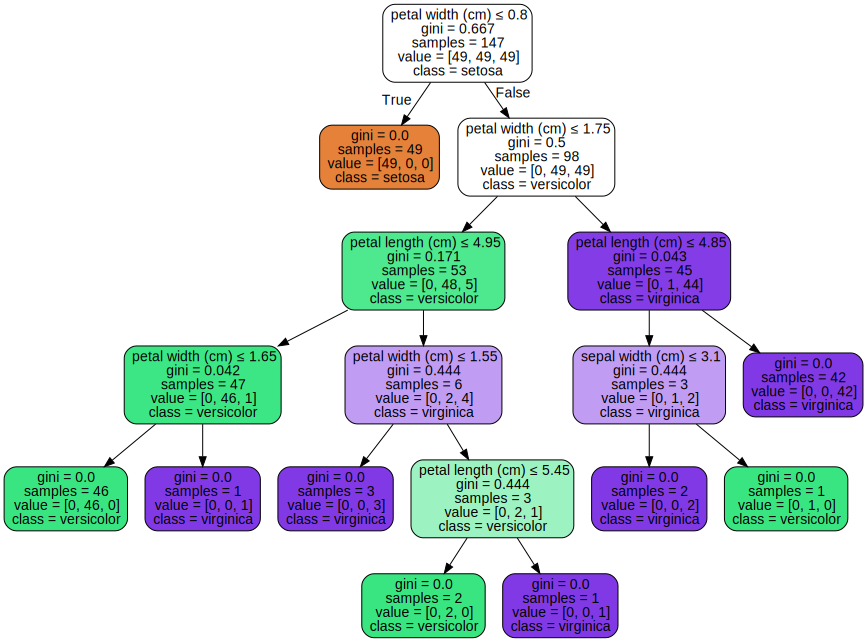

In [22]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
df = pd.get_dummies(df, columns=['Species'])
#del features_df['Species']  #delete y value
df

In [29]:
X = features_df.as_matrix()  #feature
y = df['SepalLengthCm'].as_matrix()  #label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Fit regression model / gradient boosting regressor 
model = ensemble.GradientBoostingRegressor(  

# Set up hyper parameters
    n_estimators=500,   #how many decision trees to build
    learning_rate=0.1,   #how much each additional decision tree influences the overall prediction
    max_depth=6,         #how many layers deep each individual decision tree can be
    min_samples_leaf=9,  # how many times a value must appear in our training set for a decision tree to make a decision based on it 
    max_features=0.1,    #the percentage of features in our model that we randomly choose to consider each time we create a branch in our decision tree.
    loss='huber',        #how scikit-learn calculates the model's error rate or cost as it learns
    random_state=0
)

# Train using the training data set
model.fit(X_train, y_train)  #y: correct answers, X: training features

# Save the trained model to a file so we can use it in other programs
joblib.dump(model, 'trained_house_classifier_model.pkl')

NameError: name 'features_df' is not defined

In [30]:
# Find the error rate on the training set
mse = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

# Find the error rate on the test set
mse = mean_absolute_error(y_test, model.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

# To see the difference between two data sets

NameError: name 'y_train' is not defined

In [31]:
# Load the model we trained previously
model = joblib.load('trained_house_classifier_model.pkl')

# For the house we want to value, we need to provide the features in the exact same
# arrangement as our training data set.
features_list = [
    3.0,   # SepalWidthCm
    5.2,      # PetalLengthCm
    2.3,      # PetalWidthCm
    0,      # Species_Iris-setosa
    0,      # Species_Iris-versicolor 
    1   # Species_Iris-virginica
]

# scikit-learn assumes you want to predict the values for lots of houses at once, so it expects an array.
# We just want to look at a single house, so it will be the only item in our array.
sl_to_value = [
    features_list
]

FileNotFoundError: [Errno 2] No such file or directory: 'trained_house_classifier_model.pkl'

In [32]:
# Run the model and make a prediction for each house in the homes_to_value array
predicted_home_values = model.predict(sl_to_value)

# Since we are only predicting the price of one house, just look at the first prediction returned
predicted_value = predicted_home_values[0]

print("Estimated Sepal Length: {:,.2f}Cm".format(predicted_value))


NameError: name 'model' is not defined